In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def amplitude_envelope(waveform, frame_length, hop_length):
    """
    计算音频信号的幅值包络。

    参数:
    waveform (numpy.ndarray): 输入音频信号，形状为 (n_samples,)。
    frame_length (int): 每个帧的长度，单位为样本数。
    hop_length (int): 帧之间的 hop 长度，单位为样本数。

    返回:
    numpy.ndarray: 音频信号的幅值包络，形状为 (n_frames,)。
    """
    # 在音频信号两端各填充 frame_length // 2 个样本
    pad_width = frame_length // 2
    waveform_padded = np.pad(waveform, (pad_width, pad_width), mode='reflect')
    
    # 计算帧数
    frame_num = 1 + int(np.floor((len(waveform_padded) - frame_length) / hop_length))
    
    waveform_ae = []
    for t in range(frame_num):
        start_idx = t * hop_length
        end_idx = start_idx + frame_length
        
        # 确保不超出填充后数组的边界
        if end_idx <= len(waveform_padded):
            current_frame = waveform_padded[start_idx:end_idx]
            if len(current_frame) > 0: 
                current_ae = np.max(np.abs(current_frame))
                waveform_ae.append(current_ae)
        else:
            break
    
    return np.array(waveform_ae)

In [11]:
# 绘制幅值包络信息
def plot_amplitude_envelope(waveform, waveform_AE, sample_rate, hop_length):
    plt.figure(figsize=(12, 8))
    # 帧数
    frame_scale = np.arange(0, len(waveform_AE))
    # 时间刻度
    time_scale = librosa.frames_to_time(frame_scale, hop_length=hop_length)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.plot(time_scale, waveform_AE, color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude Envelope of Audio Signal')
    plt.show()

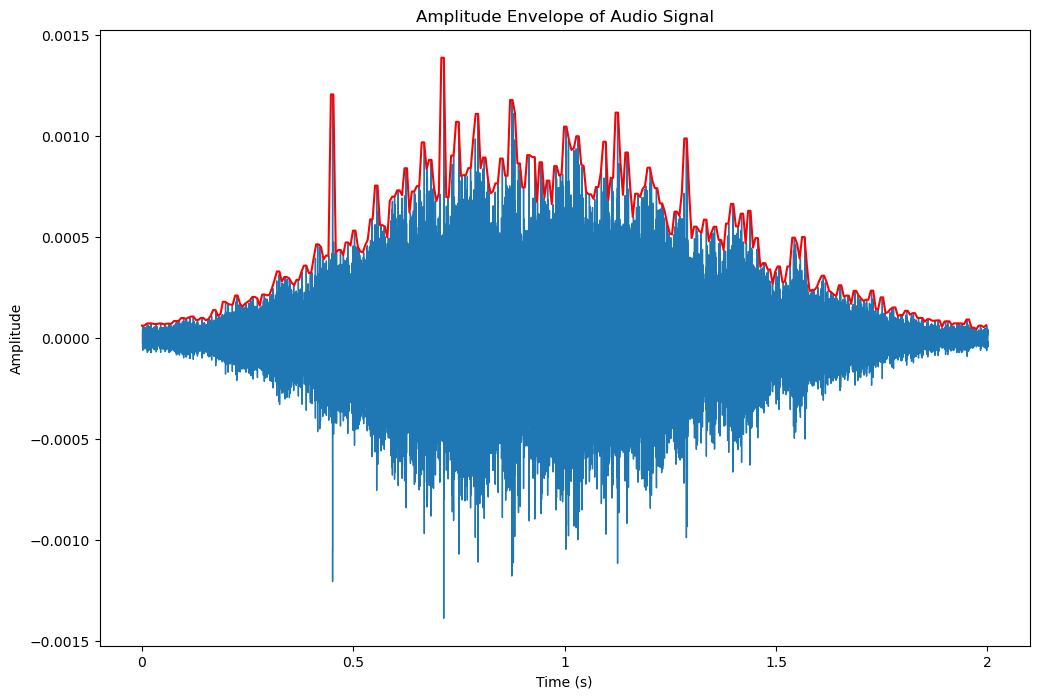

In [22]:
# 音频文件路径
audio_file = r'E:\数据集\ShipEar\data_preprocessing\3_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_18.wav'

waveform, sample_rate = librosa.load(audio_file, sr=22050)

frame_length = 256
hop_length = 128

waveform_AE = amplitude_envelope(waveform, frame_length, hop_length)
plot_amplitude_envelope(waveform, waveform_AE, sample_rate, hop_length)